## **Vanna-Volga FX Option Pricing: Black-Scholes vs. VV Corrections**

The **Vanna-Volga (VV) method** is used **adjustment technique** in FX options pricing.  
It modifies the **Black-Scholes (BS) price** to account for **volatility skew & convexity**, which are present in **real FX markets**.


#### **Why Vanna-Volga Instead of Black-Scholes?**
The **Black-Scholes model** assumes that **volatility is constant** across all strikes and maturities.  
However, in **real FX markets**, implied volatility:
- Varies across strikes (volatility smile)  
- Is affected by market conditions
- Changes due to demand for puts vs. calls (risk reversals)

The **Vanna-Volga method** adjusts BS pricing by using:
1. At-the-money (ATM) implied volatility
2. Out-of-the-money (OTM) call & put volatilities  
3. Risk Reversal (RR) = (OTM Call - OTM Put)  
4. Butterfly (BF) = (OTM Call + OTM Put - 2 × ATM)  

These corrections **adjust the BS price to match the FX volatility smile**.


### **Model Structure**
The **Vanna-Volga model** consists of three key components:

#### **1️. Compute Black-Scholes Price**
- First, the **vanilla BS price** is computed using **SABR-implied volatility**.
- This **ensures that the BS model is not using constant volatility**.

#### **2️. Calculate Vanna & Volga Adjustments**
- **Vanna**: Measures sensitivity of delta to volatility  
- **Volga**: Measures sensitivity of vega to volatility  

These are computed from market-implied volatilities:
- **Risk Reversal (RR):** Implied volatility difference between OTM calls & puts
- **Butterfly (BF):** Symmetric adjustment around ATM vol

#### **3️. Apply Vanna-Volga Corrections**
- The final price is:
  $VV\_Price = BS\_Price + \alpha \times Vanna + \beta \times Volga$

  where **α (alpha) & β (beta)** are weights used to fine-tune the correction. We will keep them fixed at this point of time.


### **Key FX Market Considerations**
- **FX volatilities are lower than equities (5-15% vs. 20-40%)**  
- **Risk Reversals are usually small (~0.5% in major FX pairs)**  
- **Butterfly spreads are even smaller (~0.2-0.3%)**  
- **Negative correlation (ρ < 0) is common in FX markets**  

Thus, **VV adjustments are small but necessary for realistic FX pricing**.
We will compute BS & VV Prices for Major **FX Pairs** We apply the **Vanna-Volga model to EUR/USD, GBP/USD, and USD/JPY options**.




In [21]:
#Import Required Libraries & Load Models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from vanna_volga_barrier import VannaVolga
from synthetic_market_data import MarketDataSimulation



FX Pair: EUR/USD


,Strike Price,Black-Scholes Price,Vanna-Volga Price
0,1.100000,1.065950e-01,0.114095
1,1.122222,8.545653e-02,0.092957
2,1.144444,6.431830e-02,0.071818
3,1.166667,4.319685e-02,0.050697
4,1.188889,2.261498e-02,0.030115
5,1.211111,6.761898e-03,0.014262
6,1.233333,8.258519e-04,0.008326
7,1.255556,4.069615e-05,0.007541
8,1.277778,1.048785e-06,0.007501
9,1.300000,1.887916e-08,0.007500


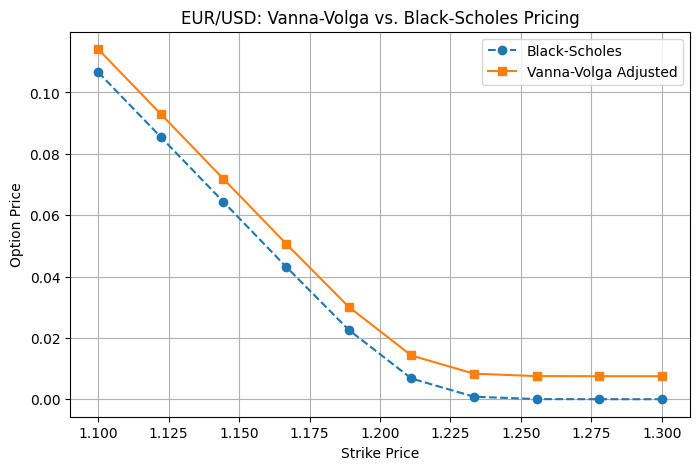


FX Pair: GBP/USD


,Strike Price,Black-Scholes Price,Vanna-Volga Price
0,1.250000,1.080290e-01,0.115529
1,1.272222,8.689053e-02,0.094391
2,1.294444,6.575246e-02,0.073252
3,1.316667,4.463608e-02,0.052136
4,1.338889,2.407583e-02,0.031576
5,1.361111,7.911829e-03,0.015412
6,1.383333,1.185836e-03,0.008686
7,1.405556,7.810443e-05,0.007578
8,1.427778,2.761047e-06,0.007503
9,1.450000,6.716802e-08,0.007500


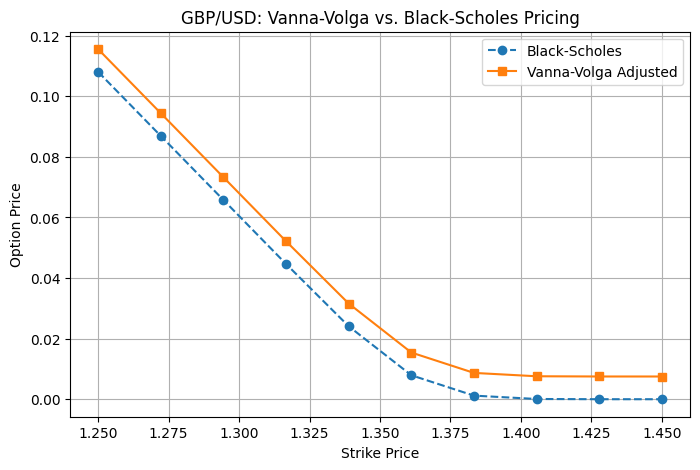


FX Pair: USD/JPY


,Strike Price,Black-Scholes Price,Vanna-Volga Price
0,140.000000,1.094630e+01,10.953796
1,142.222222,8.832453e+00,8.839953
2,144.444444,6.718610e+00,6.726110
3,146.666667,4.604767e+00,4.612267
4,148.888889,2.490924e+00,2.498424
5,151.111111,3.799654e-01,0.387465
6,153.333333,1.497133e-09,0.007500
7,155.555556,3.994411e-21,0.007500
8,157.777778,2.632058e-31,0.007500
9,160.000000,5.063292e-40,0.007500


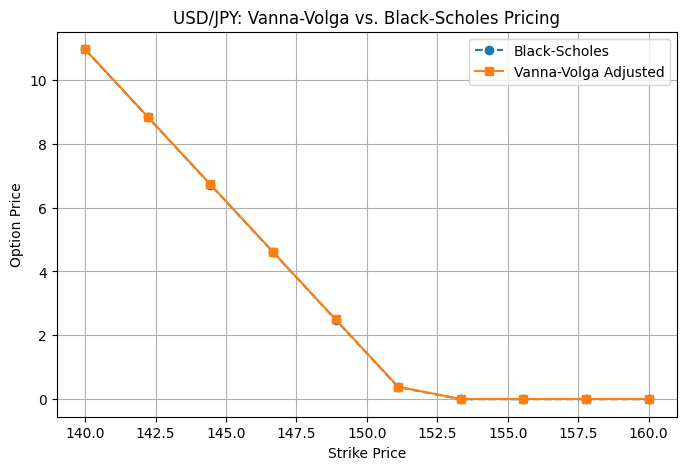

In [35]:
# Define FX pairs and strike ranges
fx_pairs = {
    "EUR/USD": {"spot": 1.20, "strike_range": np.linspace(1.10, 1.30, 10)},
    "GBP/USD": {"spot": 1.35, "strike_range": np.linspace(1.25, 1.45, 10)},
    "USD/JPY": {"spot": 150.00, "strike_range": np.linspace(140, 160, 10)}
}

# Set SABR volatility parameters
time_to_maturity = 1
domestic_rate = 0.05  # USD interest rate
foreign_rate = 0.04   # EUR, GBP, JPY interest rate
alpha, beta, rho, nu = 0.015, 0.5, 0.0, 0.2  

# Store results
results = {}

# Compute FX option prices for each pair
for fx, data in fx_pairs.items():
    spot_price = data["spot"]
    strike_prices = data["strike_range"]

    bs_prices = np.zeros(len(strike_prices))
    vv_prices = np.zeros(len(strike_prices))

    for i, K in enumerate(strike_prices):
        vv_model = VannaVolga(spot_price, K, time_to_maturity, domestic_rate, foreign_rate, 
                              alpha=alpha, beta=beta, rho=rho, nu=nu)
        bs_prices[i] = vv_model.black_scholes_price("call")
        vv_prices[i] = vv_model.vanna_volga_price("call")

    # Store results in DataFrame
    results[fx] = pd.DataFrame({
        "Strike Price": strike_prices,
        "Black-Scholes Price": bs_prices,
        "Vanna-Volga Price": vv_prices
    })

    # Display table for each FX pair
    print(f"\nFX Pair: {fx}")
    display(results[fx])  # Works in Jupyter Notebooks

    # Plot Black-Scholes vs. Vanna-Volga pricing
    plt.figure(figsize=(8, 5))
    plt.plot(strike_prices, bs_prices, label="Black-Scholes", marker="o", linestyle="--")
    plt.plot(strike_prices, vv_prices, label="Vanna-Volga Adjusted", marker="s", linestyle="-")
    plt.xlabel("Strike Price")
    plt.ylabel("Option Price")
    plt.title(f"{fx}: Vanna-Volga vs. Black-Scholes Pricing")
    plt.legend()
    plt.grid()
    plt.show()


### **Vanna-Volga vs. Black-Scholes Pricing for FX Options: Comparing Pricing Adjustments FX**

#### **1️. EUR/USD: Vanna-Volga vs. Black-Scholes Pricing**

- The **Vanna-Volga (VV) price is consistently higher than Black-Scholes (BS)**, reflecting the adjustment for market-implied volatility skews.
- The **difference between VV and BS pricing is most pronounced for deep out-of-the-money (OTM) and in-the-money (ITM) options**, as the volatility smile effect becomes stronger at extreme strikes.
- Around **at-the-money (ATM) strikes (1.20), the BS and VV prices are closer**, indicating that BS volatility assumptions are more reasonable for ATM options.
- The VV correction ensures that **option prices reflect real market conditions**, where traders demand higher volatility pricing for OTM and ITM options due to higher risks.


#### **2️. GBP/USD: Vanna-Volga vs. Black-Scholes Pricing**

- Similar to EUR/USD, the **Vanna-Volga pricing adjustment is always higher than Black-Scholes pricing**, ensuring that market-implied volatility effects are included.
- The **difference increases as the strike moves further from the ATM level (1.35)**, reflecting that market traders assign **higher implied volatility to deep ITM and OTM options**.
- For **ATM options**, BS and VV pricing remain close, showing that Black-Scholes volatility is a good estimate near the current spot price.
- **The VV model corrects Black-Scholes pricing by incorporating risk reversals and butterflies**, making pricing more aligned with real-world trading.


#### **3️. USD/JPY: Vanna-Volga vs. Black-Scholes Pricing**

- Unlike the previous two currency pairs, the **Vanna-Volga price is almost identical to Black-Scholes pricing**.
- This suggests that the **volatility smile for USD/JPY is much flatter**, meaning traders do not assign large volatility skews to deep ITM or OTM options.
- **Both VV and BS prices follow the same trend, showing that market-implied volatility does not deviate significantly from BS assumptions**.
- **USD/JPY options are less sensitive to implied volatility skews**, leading to minimal pricing corrections when using the VV model.


#### **Overall Takeaways**
- **Vanna-Volga consistently increases option prices compared to Black-Scholes**, particularly for deep ITM and OTM options.
- The **size of the VV correction varies by FX pair**:
  - **EUR/USD & GBP/USD** show significant VV corrections due to stronger volatility skews.
  - **USD/JPY** has minimal VV adjustments, indicating a flatter volatility smile.
- The **VV model is crucial for accurate FX option pricing**, as it adjusts for **market-implied volatility skew effects** that Black-Scholes ignores.
